THE SPARKS FOUNDATION INTERNSHIP TASK 2 USING UNSUPERVISED MACHINE LEARNING MODEL
                                                                                 

CREATED BY SYED HAMMAD JAVED BATCH AUG 2024

IMPORTING NECESSARY LIBRARIES

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

LOAD THE DATASET & DISPLAY THE FIRST FEW ROWS OF DATASET

In [40]:
data = pd.read_csv('Iris.csv')
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
 6   Cluster        150 non-null    int32  
dtypes: float64(4), int32(1), int64(2)
memory usage: 7.7 KB


Defining features and target variables

In [41]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] 
y_true = data['Species']  


Using Elbow method to find the optimal number of clusters

In [42]:
inertia = []
k_range = range(1, 11)  # Testing for clusters between 1 and 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


Plotting Elbow method result

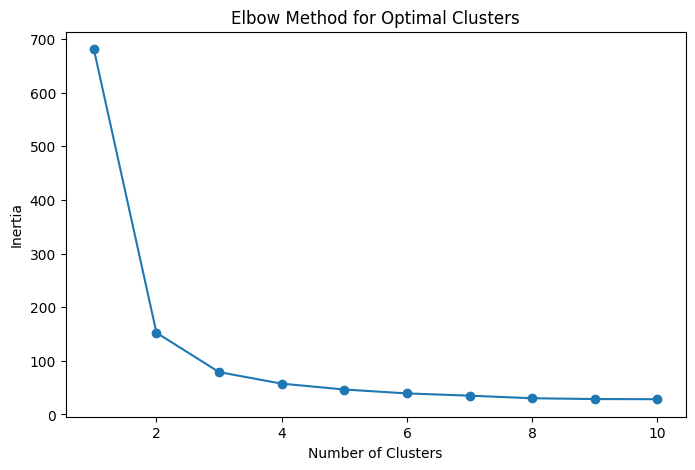

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

Applying Kmeans where optimal_clusters = 3

In [44]:
optimal_clusters = 3 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)


Label encoding clusters for classification metrics 

In [45]:
le = LabelEncoder()
y_true_encoded = le.fit_transform(y_true)
y_pred_encoded = data['Cluster']

Calculating confusion matrix 

In [47]:
conf_matrix = confusion_matrix(y_true_encoded, y_pred_encoded)


printing confusion matrix

In [48]:
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


Printing classification report

In [49]:
print('Classification Report:')
print(classification_report(y_true_encoded, y_pred_encoded, target_names=le.classes_))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.23      0.28      0.25        50

       accuracy                           0.09       150
      macro avg       0.08      0.09      0.08       150
   weighted avg       0.08      0.09      0.08       150



Plotting Clusters & Centroids

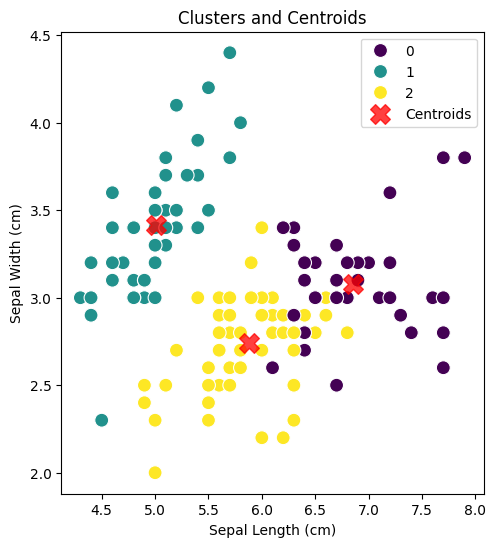

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['SepalLengthCm'], y=data['SepalWidthCm'], hue=data['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters and Centroids')
plt.legend()

Plotting True Labels

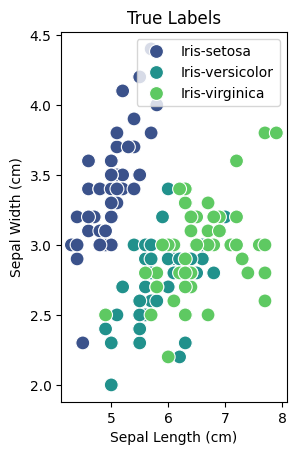

In [51]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['SepalLengthCm'], y=data['SepalWidthCm'], hue=data['Species'], palette='viridis', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('True Labels')
plt.legend()